In [164]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import pickle as pkl
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [165]:
train_filepath = "train_workspace/"
animalList = ["Human","Pig","Chicken","Rat","Mouse","Dog"]
levelList = ["Strict","Relaxed","Intermediate"]
dataList = ["Ohnologs","No-Ohnologs","Paralogs"]
dataNameList = ["ohnologs","no-ohnologs","paralog"]
sb.set_style("darkgrid")

In [166]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2610833850594445475
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 287309824
locality {
  bus_id: 1
  links {
  }
}
incarnation: 603744703411278416
physical_device_desc: "device: 0, name: TITAN Xp, pci bus id: 0000:02:00.0, compute capability: 6.1"
]


In [167]:
working_level = "Intermediate"

In [168]:
def get_df_dict(level):
    df_dict = {}    
    current_file_path = train_filepath + level + "/"
    for (dataName,data) in zip(dataNameList,dataList):                
        df_dict[data] = pd.read_pickle(current_file_path + dataName + "-complete2.pkl")        
    return df_dict

In [169]:
df_dict = get_df_dict(working_level)

In [170]:
df_dict["Paralogs"].isnull().values.any()

False

In [171]:
for dataName in dataList:
    df_dict[dataName].fillna(0,inplace=True)

In [172]:
print(df_dict["Ohnologs"].isnull().values.any())
print(df_dict["No-Ohnologs"].isnull().values.any())
print(df_dict["Paralogs"].isnull().values.any())

False
False
False


Text(0.5, 1.0, 'Ohnologs')

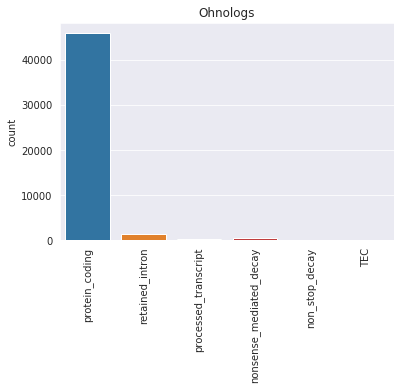

In [173]:
data = "Ohnologs"
ser = df_dict[data]["Sequence-1-Transcript-Biotype"].append(df_dict[data]["Sequence-2-Transcript-Biotype"])
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [174]:
filter_ids_1 = df_dict[data]["Sequence-1-Transcript-Biotype"] != "protein_coding"
filter_ids_2 = df_dict[data]["Sequence-2-Transcript-Biotype"] != "protein_coding"

df_dict[data].loc[filter_ids_1,"Sequence-1-Transcript-Biotype"] = "Other"
df_dict[data].loc[filter_ids_2,"Sequence-2-Transcript-Biotype"] = "Other"

Text(0.5, 1.0, 'Ohnologs')

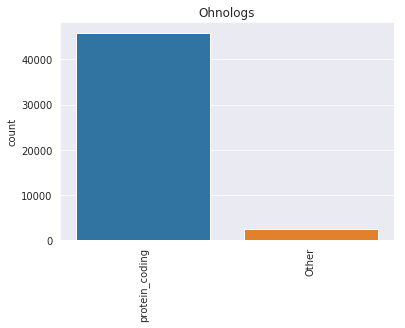

In [175]:
ser = df_dict[data]["Sequence-1-Transcript-Biotype"].append(df_dict[data]["Sequence-2-Transcript-Biotype"])
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [176]:
data = "No-Ohnologs"
filter_ids_1 = df_dict[data]["Sequence-1-Transcript-Biotype"] != "protein_coding"
filter_ids_2 = df_dict[data]["Sequence-2-Transcript-Biotype"] != "protein_coding"

df_dict[data].loc[filter_ids_1,"Sequence-1-Transcript-Biotype"] = "Other"
df_dict[data].loc[filter_ids_2,"Sequence-2-Transcript-Biotype"] = "Other"

Text(0.5, 1.0, 'No-Ohnologs')

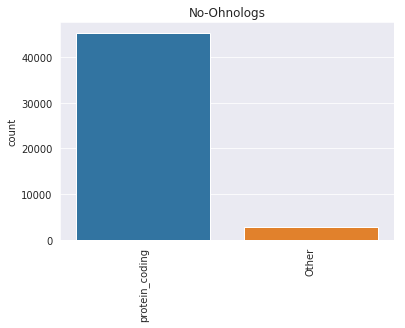

In [177]:
ser = df_dict[data]["Sequence-1-Transcript-Biotype"].append(df_dict[data]["Sequence-2-Transcript-Biotype"])
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [178]:
data = "Paralogs"
filter_ids_1 = df_dict[data]["Sequence-1-Transcript-Biotype"] != "protein_coding"
filter_ids_2 = df_dict[data]["Sequence-2-Transcript-Biotype"] != "protein_coding"

df_dict[data].loc[filter_ids_1,"Sequence-1-Transcript-Biotype"] = "Other"
df_dict[data].loc[filter_ids_2,"Sequence-2-Transcript-Biotype"] = "Other"

Text(0.5, 1.0, 'Paralogs')

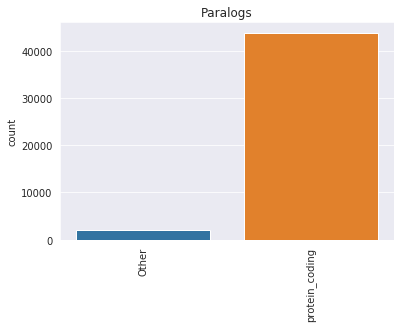

In [179]:
ser = df_dict[data]["Sequence-1-Transcript-Biotype"].append(df_dict[data]["Sequence-2-Transcript-Biotype"])
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)


Text(0.5, 1.0, 'Ohnologs')

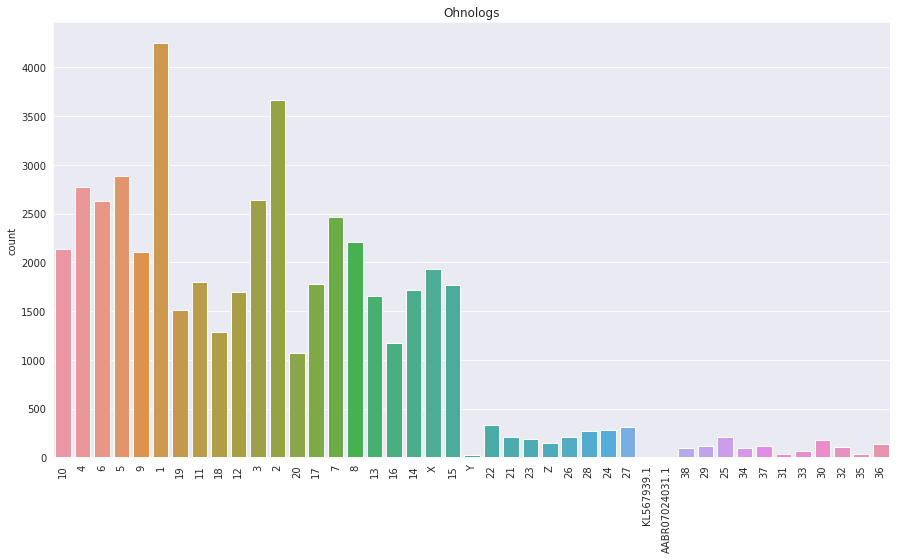

In [180]:
data = "Ohnologs"
ser = df_dict[data]["Sequence-1-Chromosome"].append(df_dict[data]["Sequence-2-Chromosome"])
plt.figure(figsize=(15,8))
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [181]:
ser.unique()
ser_filter = ser[ser != "KL567939.1"]
ser_filter = ser_filter[ser_filter != "AABR07024031.1"]

Text(0.5, 1.0, 'Ohnologs')

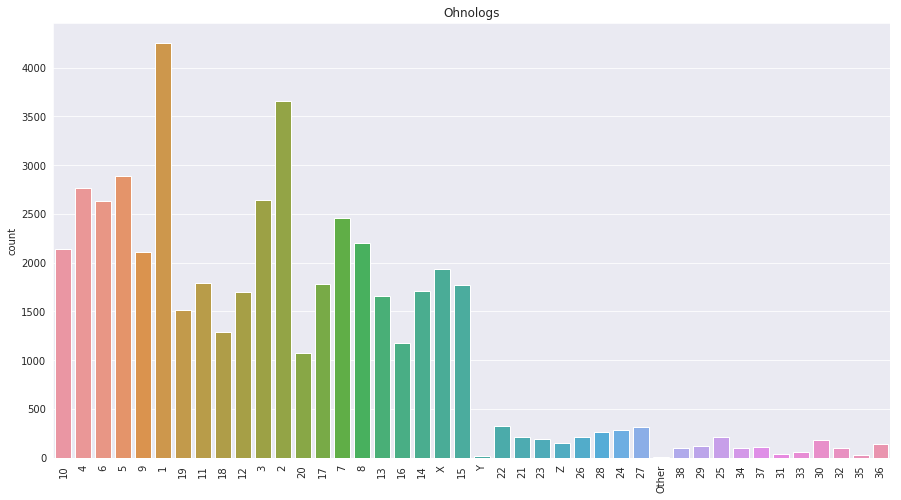

In [182]:
df_dict[data]["Sequence-1-Chromosome"].replace("KL567939.1","Other",inplace=True)
df_dict[data]["Sequence-2-Chromosome"].replace("KL567939.1","Other",inplace=True)

df_dict[data]["Sequence-1-Chromosome"].replace("AABR07024031.1","Other",inplace=True)
df_dict[data]["Sequence-2-Chromosome"].replace("AABR07024031.1","Other",inplace=True)

data = "Ohnologs"
ser = df_dict[data]["Sequence-1-Chromosome"].append(df_dict[data]["Sequence-2-Chromosome"])
plt.figure(figsize=(15,8))
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [183]:
data = "No-Ohnologs"

In [184]:
filter_ids_1 = ~df_dict[data]["Sequence-1-Chromosome"].isin(ser_filter.to_list())
filter_ids_2 = ~df_dict[data]["Sequence-2-Chromosome"].isin(ser_filter.to_list())

df_dict[data].loc[filter_ids_1,"Sequence-1-Chromosome"] = "Other"
df_dict[data].loc[filter_ids_2,"Sequence-2-Chromosome"] = "Other"

Text(0.5, 1.0, 'No-Ohnologs')

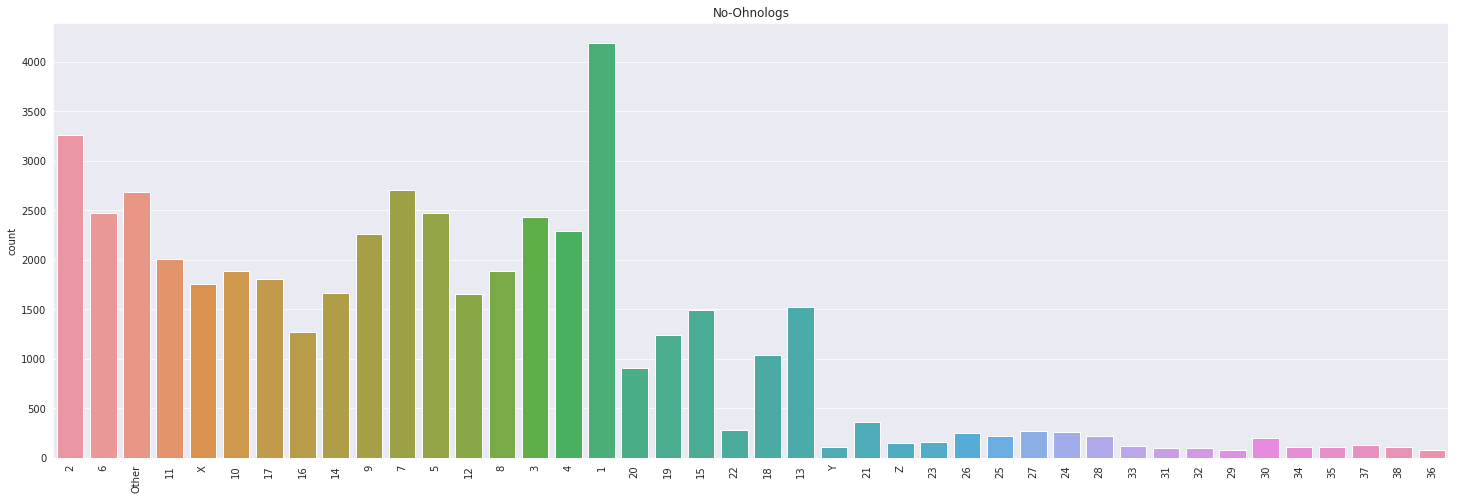

In [185]:
ser = df_dict[data]["Sequence-1-Chromosome"].append(df_dict[data]["Sequence-2-Chromosome"])
plt.figure(figsize=(25,8))
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [186]:
data = "Paralogs"

In [187]:
filter_ids_1 = ~df_dict[data]["Sequence-1-Chromosome"].isin(ser_filter.to_list())
filter_ids_2 = ~df_dict[data]["Sequence-2-Chromosome"].isin(ser_filter.to_list())

df_dict[data].loc[filter_ids_1,"Sequence-1-Chromosome"] = "Other"
df_dict[data].loc[filter_ids_2,"Sequence-2-Chromosome"] = "Other"

Text(0.5, 1.0, 'Paralogs')

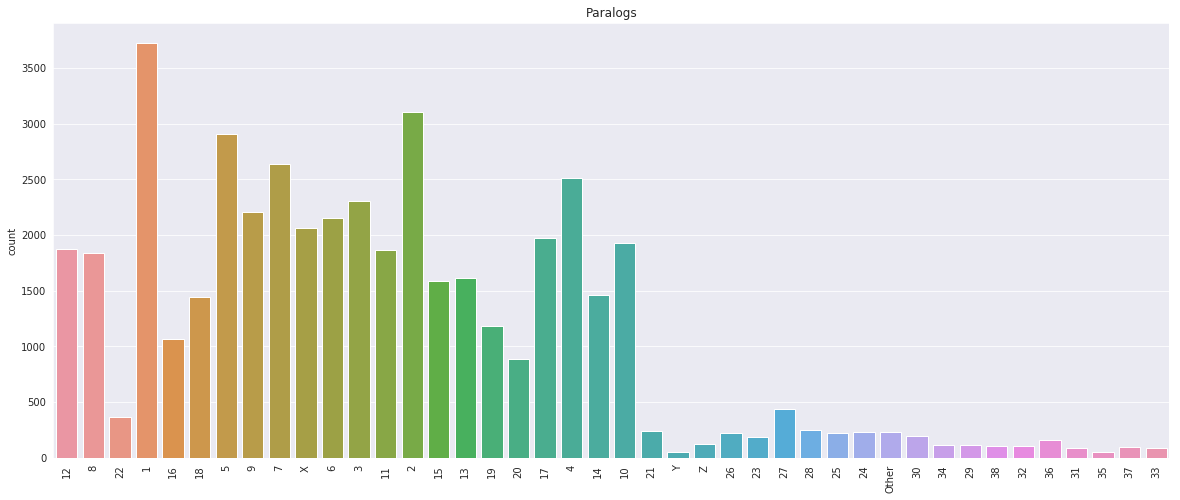

In [188]:
ser = df_dict[data]["Sequence-1-Chromosome"].append(df_dict[data]["Sequence-2-Chromosome"])
plt.figure(figsize=(20,8))
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [189]:
df_dict["Ohnologs"].head()

,Is_Ohnolog,Is_Paralog,Sequence-1,Sequence-1 GC,Sequence-1 Id,Sequence-1 Length,Sequence-1-Transcript Id,Sequence-2,Sequence-2 GC,Sequence-2 Id,Sequence-2 Length,Sequence-2-Transcript Id,Species,Sequence-1-Transcript-Version,Sequence-2-Transcript-Version,Sequence-1-Transcript-Biotype,Sequence-2-Transcript-Biotype,Sequence-1-Chromosome,Sequence-2-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits
0,1,0.0,CTTTGGAAGTCCTATGAGGGACCATTTACGGTTTCCTCAGTAATTT...,0.429090,ENSG00000095464,3307,ENST00000371447,AGTATGTTTTGCAGACAAGACCCAGAGAAGTCCAGACTGGACTTGT...,0.469856,ENSG00000132915,5706,ENST00000508173,Human,3,5,protein_coding,Other,10,5,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.00,0.00,0.000000e+00,0.000,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17
1,1,0.0,CGTTTTGGCAAGGGATTAAAGTGCTCCCCCCTGTGGCAGCAGTGAC...,0.441268,ENSG00000077684,5772,ENST00000226319,ATACAATAGTGCTCCGCGCCGCCTCAGCCGCCGCCGCCGCCCAACC...,0.450953,ENSG00000102221,4934,ENST00000614628,Human,10,4,protein_coding,protein_coding,4,X,78.307,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.50,0.00,2.678500e-03,34.350,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27
2,1,0.0,AGTCAACCTCTGGAAGTAAGTCAACTCCATTCTGAAAAAGAAGAGT...,0.357972,ENSG00000109158,11973,ENST00000264318,ACATAATCTAAGACCACAAACCACCTTGTTCCACGTGAGAAGGAAA...,0.402006,ENSG00000145863,2393,ENST00000523217,Human,3,5,protein_coding,protein_coding,4,5,77.410,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.00,0.00,2.130000e-11,60.200,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8
3,1,0.0,ACCACAGAGGCGTCTGGCTAACTCATCTCCAGACCTAAGTTGGGAA...,0.572634,ENSG00000137216,3318,ENST00000259746,CAGTCTCCTGCCATGCAAAGAAGGCTCATAGAGTTGCTTTGGAAGT...,0.516923,ENSG00000196187,5407,ENST00000474478,Human,13,5,protein_coding,Other,6,1,0.000,0.0,0.0,0.0,0.000000e+00,0.0,86.0485,45.5,6.50,0.00,1.120000e-04,49.150,99.259222,11.833333,0.111111,0.000000,4.424444,22.344444,97.938150,15.200000,0.750000,0.000000,3.982011,25.025000,20
4,1,0.0,GGGCCTCCTCCCTGGGGTGTGAGCAGGTCGGCGCGCCACACTTCTC...,0.468779,ENSG00000113396,3219,ENST00000262462,AGTCCTGCCCGGAACCCCCGGCAACGCGCATACGACTACACCTGCT...,0.489140,ENSG00000140284,2394,ENST00000267842,Human,8,9,protein_coding,protein_coding,5,15,0.000,0.0,0.0,0.0,0.000000e+00,0.0,79.3405,90.0,19.25,1.25,1.000000e-03,52.375,96.864143,15.857143,1.285714,0.000000,1.409714,23.271429,90.491909,42.818182,7.818182,0.454545,0.897455,33.854545,11


In [190]:
df_dict["Ohnologs"] = pd.get_dummies(df_dict["Ohnologs"] ,prefix=['Seq-1-Biotype'],columns=['Sequence-1-Transcript-Biotype'], drop_first=True)
df_dict["Ohnologs"] = pd.get_dummies(df_dict["Ohnologs"] ,prefix=['Seq-2-Biotype'],columns=['Sequence-2-Transcript-Biotype'], drop_first=True)

In [191]:
df_dict["Ohnologs"].head()

,Is_Ohnolog,Is_Paralog,Sequence-1,Sequence-1 GC,Sequence-1 Id,Sequence-1 Length,Sequence-1-Transcript Id,Sequence-2,Sequence-2 GC,Sequence-2 Id,Sequence-2 Length,Sequence-2-Transcript Id,Species,Sequence-1-Transcript-Version,Sequence-2-Transcript-Version,Sequence-1-Chromosome,Sequence-2-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Seq-2-Biotype_protein_coding
0,1,0.0,CTTTGGAAGTCCTATGAGGGACCATTTACGGTTTCCTCAGTAATTT...,0.429090,ENSG00000095464,3307,ENST00000371447,AGTATGTTTTGCAGACAAGACCCAGAGAAGTCCAGACTGGACTTGT...,0.469856,ENSG00000132915,5706,ENST00000508173,Human,3,5,10,5,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.00,0.00,0.000000e+00,0.000,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17,1,0
1,1,0.0,CGTTTTGGCAAGGGATTAAAGTGCTCCCCCCTGTGGCAGCAGTGAC...,0.441268,ENSG00000077684,5772,ENST00000226319,ATACAATAGTGCTCCGCGCCGCCTCAGCCGCCGCCGCCGCCCAACC...,0.450953,ENSG00000102221,4934,ENST00000614628,Human,10,4,4,X,78.307,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.50,0.00,2.678500e-03,34.350,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27,1,1
2,1,0.0,AGTCAACCTCTGGAAGTAAGTCAACTCCATTCTGAAAAAGAAGAGT...,0.357972,ENSG00000109158,11973,ENST00000264318,ACATAATCTAAGACCACAAACCACCTTGTTCCACGTGAGAAGGAAA...,0.402006,ENSG00000145863,2393,ENST00000523217,Human,3,5,4,5,77.410,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.00,0.00,2.130000e-11,60.200,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8,1,1
3,1,0.0,ACCACAGAGGCGTCTGGCTAACTCATCTCCAGACCTAAGTTGGGAA...,0.572634,ENSG00000137216,3318,ENST00000259746,CAGTCTCCTGCCATGCAAAGAAGGCTCATAGAGTTGCTTTGGAAGT...,0.516923,ENSG00000196187,5407,ENST00000474478,Human,13,5,6,1,0.000,0.0,0.0,0.0,0.000000e+00,0.0,86.0485,45.5,6.50,0.00,1.120000e-04,49.150,99.259222,11.833333,0.111111,0.000000,4.424444,22.344444,97.938150,15.200000,0.750000,0.000000,3.982011,25.025000,20,1,0
4,1,0.0,GGGCCTCCTCCCTGGGGTGTGAGCAGGTCGGCGCGCCACACTTCTC...,0.468779,ENSG00000113396,3219,ENST00000262462,AGTCCTGCCCGGAACCCCCGGCAACGCGCATACGACTACACCTGCT...,0.489140,ENSG00000140284,2394,ENST00000267842,Human,8,9,5,15,0.000,0.0,0.0,0.0,0.000000e+00,0.0,79.3405,90.0,19.25,1.25,1.000000e-03,52.375,96.864143,15.857143,1.285714,0.000000,1.409714,23.271429,90.491909,42.818182,7.818182,0.454545,0.897455,33.854545,11,1,1


In [192]:
df_dict["Ohnologs"] = pd.get_dummies(df_dict["Ohnologs"] ,prefix=['Specie'],columns=['Species'], drop_first=False)

In [193]:
pd.set_option("display.max_columns", None)
df_dict["Ohnologs"].head()

,Is_Ohnolog,Is_Paralog,Sequence-1,Sequence-1 GC,Sequence-1 Id,Sequence-1 Length,Sequence-1-Transcript Id,Sequence-2,Sequence-2 GC,Sequence-2 Id,Sequence-2 Length,Sequence-2-Transcript Id,Sequence-1-Transcript-Version,Sequence-2-Transcript-Version,Sequence-1-Chromosome,Sequence-2-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Seq-2-Biotype_protein_coding,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat
0,1,0.0,CTTTGGAAGTCCTATGAGGGACCATTTACGGTTTCCTCAGTAATTT...,0.429090,ENSG00000095464,3307,ENST00000371447,AGTATGTTTTGCAGACAAGACCCAGAGAAGTCCAGACTGGACTTGT...,0.469856,ENSG00000132915,5706,ENST00000508173,3,5,10,5,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.00,0.00,0.000000e+00,0.000,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17,1,0,0,0,1,0,0,0
1,1,0.0,CGTTTTGGCAAGGGATTAAAGTGCTCCCCCCTGTGGCAGCAGTGAC...,0.441268,ENSG00000077684,5772,ENST00000226319,ATACAATAGTGCTCCGCGCCGCCTCAGCCGCCGCCGCCGCCCAACC...,0.450953,ENSG00000102221,4934,ENST00000614628,10,4,4,X,78.307,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.50,0.00,2.678500e-03,34.350,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27,1,1,0,0,1,0,0,0
2,1,0.0,AGTCAACCTCTGGAAGTAAGTCAACTCCATTCTGAAAAAGAAGAGT...,0.357972,ENSG00000109158,11973,ENST00000264318,ACATAATCTAAGACCACAAACCACCTTGTTCCACGTGAGAAGGAAA...,0.402006,ENSG00000145863,2393,ENST00000523217,3,5,4,5,77.410,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.00,0.00,2.130000e-11,60.200,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8,1,1,0,0,1,0,0,0
3,1,0.0,ACCACAGAGGCGTCTGGCTAACTCATCTCCAGACCTAAGTTGGGAA...,0.572634,ENSG00000137216,3318,ENST00000259746,CAGTCTCCTGCCATGCAAAGAAGGCTCATAGAGTTGCTTTGGAAGT...,0.516923,ENSG00000196187,5407,ENST00000474478,13,5,6,1,0.000,0.0,0.0,0.0,0.000000e+00,0.0,86.0485,45.5,6.50,0.00,1.120000e-04,49.150,99.259222,11.833333,0.111111,0.000000,4.424444,22.344444,97.938150,15.200000,0.750000,0.000000,3.982011,25.025000,20,1,0,0,0,1,0,0,0
4,1,0.0,GGGCCTCCTCCCTGGGGTGTGAGCAGGTCGGCGCGCCACACTTCTC...,0.468779,ENSG00000113396,3219,ENST00000262462,AGTCCTGCCCGGAACCCCCGGCAACGCGCATACGACTACACCTGCT...,0.489140,ENSG00000140284,2394,ENST00000267842,8,9,5,15,0.000,0.0,0.0,0.0,0.000000e+00,0.0,79.3405,90.0,19.25,1.25,1.000000e-03,52.375,96.864143,15.857143,1.285714,0.000000,1.409714,23.271429,90.491909,42.818182,7.818182,0.454545,0.897455,33.854545,11,1,1,0,0,1,0,0,0


In [194]:
df_dict["No-Ohnologs"] = pd.get_dummies(df_dict["No-Ohnologs"] ,prefix=['Seq-1-Biotype'],columns=['Sequence-1-Transcript-Biotype'], drop_first=True)
df_dict["No-Ohnologs"] = pd.get_dummies(df_dict["No-Ohnologs"] ,prefix=['Seq-2-Biotype'],columns=['Sequence-2-Transcript-Biotype'], drop_first=True)
df_dict["No-Ohnologs"] = pd.get_dummies(df_dict["No-Ohnologs"] ,prefix=['Specie'],columns=['Species'], drop_first=False)

df_dict["Paralogs"] = pd.get_dummies(df_dict["Paralogs"] ,prefix=['Seq-1-Biotype'],columns=['Sequence-1-Transcript-Biotype'], drop_first=True)
df_dict["Paralogs"] = pd.get_dummies(df_dict["Paralogs"] ,prefix=['Seq-2-Biotype'],columns=['Sequence-2-Transcript-Biotype'], drop_first=True)
df_dict["Paralogs"] = pd.get_dummies(df_dict["Paralogs"] ,prefix=['Specie'],columns=['Species'], drop_first=False)

## Start Designing

In [199]:
blast_columns = ["Percent Identical Matches","Aligment Length","Nr Mismatch","Nr Gap Open","Evalue","Bit Score"]

e_values_columns = ["Evalue_Total","Evalue_High","Evalue_Medium","Evalue_Low"]

blast_types = ["High","Medium","Low","Total"]
blast_col_Total = [i + "_Total" for i in blast_columns] 
blast_col_High = [i + "_High" for i in blast_columns]
blast_col_Medium = [i + "_Medium" for i in blast_columns]
blast_col_Low = [i + "_Low" for i in blast_columns]

blast_cols_levels = blast_col_High + blast_col_Medium + blast_col_Low
total_columns = (blast_col_High + blast_col_Medium + blast_col_Low + blast_col_Total + ["Nr Hits"])

non_training_meta_features = ["Sequence-1","Sequence-2","Sequence-1 Id","Sequence-1-Transcript Id","Sequence-2 Id","Sequence-2-Transcript Id","Sequence-1-Transcript-Version","Sequence-2-Transcript-Version"]

sequence_1_metadata = ["Sequence-1 GC","Sequence-1 Length","Sequence-1-Chromosome","Seq-1-Biotype_protein_coding"]
sequence_2_metadata = ["Sequence-2 GC","Sequence-2 Length","Sequence-2-Chromosome","Seq-2-Biotype_protein_coding"]

sequence_1_metadata_diferential = ["Sequence-1 GC","Sequence-1 Length"]
sequence_2_metadata_diferential = ["Sequence-2 GC","Sequence-2 Length"]

sequence_1_metadata_categorical = ["Sequence-1-Chromosome","Seq-1-Biotype_protein_coding"]
sequence_2_metadata_categorical = ["Sequence-2-Chromosome","Seq-2-Biotype_protein_coding"]

species_metadata = ["Specie_Chicken","Specie_Dog","Specie_Human","Specie_Mouse","Specie_Pig","Specie_Rat"]

emb_size = 100
if(type_chosen == "cdna2"):
    emb_size = 200
embedding_1_cols = ["Embedding1_" + str(i) for i in range(0,emb_size)]
embedding_2_cols = ["Embedding2_" + str(i) for i in range(0,emb_size)]

In [200]:
## Ver los efectos de no normalizar las longitudes o tambien de como hacer el encoding de los Chromosomas
dataset_ohnologs = df_dict["Ohnologs"].drop(non_training_meta_features,axis=1)

cols = dataset_ohnologs.columns.tolist()
cols.insert(3, cols.pop(5))
cols.insert(4, cols.pop(7))
dataset_ohnologs = dataset_ohnologs[cols]

dataset_ohnologs = pd.concat([dataset_ohnologs[species_metadata],dataset_ohnologs.drop(dataset_ohnologs[species_metadata],axis=1)],axis=1, sort=False)
dataset_ohnologs.head()

,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Is_Paralog,Sequence-1 GC,Sequence-2 Length,Sequence-2-Chromosome,Sequence-1 Length,Sequence-2 GC,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Seq-2-Biotype_protein_coding,Cosine_Similarity
0,0,0,1,0,0,0,1,0.0,0.429090,5706,5,3307,0.469856,10,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.00,0.00,0.000000e+00,0.000,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17,1,0,0.992272
1,0,0,1,0,0,0,1,0.0,0.441268,4934,X,5772,0.450953,4,78.307,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.50,0.00,2.678500e-03,34.350,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27,1,1,0.995751
2,0,0,1,0,0,0,1,0.0,0.357972,2393,5,11973,0.402006,4,77.410,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.00,0.00,2.130000e-11,60.200,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8,1,1,0.993432
3,0,0,1,0,0,0,1,0.0,0.572634,5407,1,3318,0.516923,6,0.000,0.0,0.0,0.0,0.000000e+00,0.0,86.0485,45.5,6.50,0.00,1.120000e-04,49.150,99.259222,11.833333,0.111111,0.000000,4.424444,22.344444,97.938150,15.200000,0.750000,0.000000,3.982011,25.025000,20,1,0,0.983308
4,0,0,1,0,0,0,1,0.0,0.468779,2394,15,3219,0.489140,5,0.000,0.0,0.0,0.0,0.000000e+00,0.0,79.3405,90.0,19.25,1.25,1.000000e-03,52.375,96.864143,15.857143,1.285714,0.000000,1.409714,23.271429,90.491909,42.818182,7.818182,0.454545,0.897455,33.854545,11,1,1,0.991254


In [201]:
dataset_ohnologs.reset_index(inplace=True, drop=True)
dataset_ohnologs = pd.concat([dataset_ohnologs.drop(sequence_2_metadata,axis=1),df_emb_dict["Ohnologs"][0],dataset_ohnologs[sequence_2_metadata],df_emb_dict["Ohnologs"][1]],axis=1, sort=False)
cols = dataset_ohnologs.columns.tolist()
dataset_ohnologs = pd.concat([dataset_ohnologs[cols[:10]],dataset_ohnologs["Seq-1-Biotype_protein_coding"],dataset_ohnologs[cols[10:]].drop(["Seq-1-Biotype_protein_coding"],axis=1)],axis=1, sort=False)
dataset_ohnologs.head()

,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Is_Paralog,Sequence-1 GC,Sequence-1 Length,Seq-1-Biotype_protein_coding,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Cosine_Similarity,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,Embedding2_28,Embedding2_29,Embedding2_30,Embedding2_31,Embedding2_32,Embedding2_33,Embedding2_34,Embedding2_35,Embedding2_36,Embedding2_37,Embedding2_38,Embedding2_39,Embedding2_40,Embedding2_41,Embedding2_42,Embedding2_43,Embedding2_44,Embedding2_45,Embedding2_46,Embedding2_47,Embedding2_48,Embedding2_49,Embedding2_50,Embedding2_51,Embedding2_52,Embedding2_53,Embedding2_54,Embedding2_55,Embedding2_56,Embedding2_57,Embedding2_58,Embedding2_59,Embedding2_60,Embedding2_61,Embedding2_62,Embedding2_63,Embedding2_64,Embedding2_65,Embedding2_66,Embedding2_67,Embedding2_68,Embedding2_69,Embedding2_70,Embedding2_71,Embedding2_72,Embedding2_73,Embedding2_74,Embedding2_75,Embedding2_76,Embedding2_77,Embedding2_78,Embedding2_79,Embedding2_80,Embedding2_81,Embedding2_82,Embedding2_83,Embedding2_84,Embedding2_85,Embedding2_86,Embedding2_87,Embedding2_88,Embedding2_89,Embedding2_90,Embedding2_91,Embedding2_92,Embedding2_93,Embedding2_94,Embedding2_95,Embedding2_96,Embedding2_97,Embedding2_98,Embedding2_99
0,0,0,1,0,0,0,1,0.0,0.429090,3307,1,10,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.00,0.00,0.000000e+00,0.000,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17,0.992272,-225.249489,-145.434467,-37.163567,5.037097,-59.950807,-85.433112,179.793917,-157.416318,211.671259,68.463704,-81.050190,-48.181736,69.643337,-197.646675,-120.546109,32.945969,-0.335328,-123.360367,-130.157941,-167.01

In [202]:
## Realizar lo mismo con los No Ohnologs
dataset_no_ohnologs = df_dict["No-Ohnologs"].drop(non_training_meta_features,axis=1)

cols = dataset_no_ohnologs.columns.tolist()
cols.insert(3, cols.pop(5))
cols.insert(4, cols.pop(7))
dataset_no_ohnologs = dataset_no_ohnologs[cols]

dataset_no_ohnologs = pd.concat([dataset_no_ohnologs[species_metadata],dataset_no_ohnologs.drop(dataset_no_ohnologs[species_metadata],axis=1)],axis=1, sort=False)
dataset_no_ohnologs.head()

,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Is_Paralog,Sequence-1 GC,Sequence-2 Length,Sequence-2-Chromosome,Sequence-1 Length,Sequence-2 GC,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Seq-2-Biotype_protein_coding,Cosine_Similarity
0,0,0,1,0,0,0,0,0.0,0.572397,4282,2,2804,0.393975,2,0.0,0.0,0.0,0.0,0.0,0.0,82.157,48.0,7.5,1.0,6.850246e-05,41.75,95.555500,14.000000,0.500000,0.250000,0.700000,22.350000,91.089333,25.333333,2.833333,0.500000,0.466690,28.816667,6.0,1,1,0.814760
1,0,0,1,0,0,0,0,0.0,0.566885,1971,5,1069,0.514460,6,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000e+00,0.00,96.667091,14.363636,0.272727,0.272727,5.463636,23.627273,96.667091,14.363636,0.272727,0.272727,5.463636,23.627273,11.0,0,1,0.973341
2,0,0,1,0,0,0,0,0.0,0.582427,1591,8,6066,0.678818,Other,0.0,0.0,0.0,0.0,0.0,0.0,76.471,102.0,22.0,2.0,2.870000e-10,54.70,98.035700,12.900000,0.100000,0.200000,1.722300,22.900000,96.075273,21.000000,2.090909,0.363636,1.565727,25.790909,11.0,1,0,0.948907
3,0,0,1,0,0,0,0,0.0,0.630495,2487,6,3640,0.536791,11,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000e+00,0.00,97.296182,13.090909,0.181818,0.272727,3.754545,22.254545,97.296182,13.090909,0.181818,0.272727,3.754545,22.254545,11.0,1,1,0.866713
4,0,0,1,0,0,0,0,0.0,0.537071,10557,5,1106,0.398788,X,0.0,0.0,0.0,0.0,0.0,0.0,88.889,27.0,3.0,0.0,1.000000e-03,34.40,96.745600,16.100000,1.350000,0.100000,5.085250,22.615000,96.371476,16.619048,1.428571,0.095238,4.843143,23.176190,21.0,1,1,0.969000


In [203]:
dataset_no_ohnologs.reset_index(inplace=True, drop=True)

dataset_no_ohnologs = pd.concat([dataset_no_ohnologs.drop(sequence_2_metadata,axis=1),df_emb_dict["No-Ohnologs"][0],dataset_no_ohnologs[sequence_2_metadata],df_emb_dict["No-Ohnologs"][1]],axis=1, sort=False)
cols = dataset_no_ohnologs.columns.tolist()
dataset_no_ohnologs = pd.concat([dataset_no_ohnologs[cols[:10]],dataset_no_ohnologs["Seq-1-Biotype_protein_coding"],dataset_no_ohnologs[cols[10:]].drop(["Seq-1-Biotype_protein_coding"],axis=1)],axis=1, sort=False)
dataset_no_ohnologs.head()

,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Is_Paralog,Sequence-1 GC,Sequence-1 Length,Seq-1-Biotype_protein_coding,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Cosine_Similarity,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,Embedding2_28,Embedding2_29,Embedding2_30,Embedding2_31,Embedding2_32,Embedding2_33,Embedding2_34,Embedding2_35,Embedding2_36,Embedding2_37,Embedding2_38,Embedding2_39,Embedding2_40,Embedding2_41,Embedding2_42,Embedding2_43,Embedding2_44,Embedding2_45,Embedding2_46,Embedding2_47,Embedding2_48,Embedding2_49,Embedding2_50,Embedding2_51,Embedding2_52,Embedding2_53,Embedding2_54,Embedding2_55,Embedding2_56,Embedding2_57,Embedding2_58,Embedding2_59,Embedding2_60,Embedding2_61,Embedding2_62,Embedding2_63,Embedding2_64,Embedding2_65,Embedding2_66,Embedding2_67,Embedding2_68,Embedding2_69,Embedding2_70,Embedding2_71,Embedding2_72,Embedding2_73,Embedding2_74,Embedding2_75,Embedding2_76,Embedding2_77,Embedding2_78,Embedding2_79,Embedding2_80,Embedding2_81,Embedding2_82,Embedding2_83,Embedding2_84,Embedding2_85,Embedding2_86,Embedding2_87,Embedding2_88,Embedding2_89,Embedding2_90,Embedding2_91,Embedding2_92,Embedding2_93,Embedding2_94,Embedding2_95,Embedding2_96,Embedding2_97,Embedding2_98,Embedding2_99
0,0,0,1,0,0,0,0,0.0,0.572397,2804,1,2,0.0,0.0,0.0,0.0,0.0,0.0,82.157,48.0,7.5,1.0,6.850246e-05,41.75,95.555500,14.000000,0.500000,0.250000,0.700000,22.350000,91.089333,25.333333,2.833333,0.500000,0.466690,28.816667,6.0,0.814760,-198.436503,-163.135627,18.144069,39.369402,5.058578,-46.547860,64.490986,-108.387387,91.120368,-10.888737,-49.814025,-134.045131,124.048494,-121.223292,-66.293042,-21.718460,-48.362913,-25.872544,-125.634904,-37.601092,93.572215,62.095102

In [204]:
## Realizar lo mismo con los No Ohnologs
dataset_paralogs = df_dict["Paralogs"].drop(non_training_meta_features,axis=1)

cols = dataset_paralogs.columns.tolist()
cols.insert(3, cols.pop(5))
cols.insert(4, cols.pop(7))
dataset_paralogs = dataset_paralogs[cols]

dataset_paralogs = pd.concat([dataset_paralogs[species_metadata],dataset_paralogs.drop(dataset_paralogs[species_metadata],axis=1)],axis=1, sort=False)
dataset_paralogs.head()

,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Is_Paralog,Sequence-1 GC,Sequence-2 Length,Sequence-2-Chromosome,Sequence-1 Length,Sequence-2 GC,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Seq-2-Biotype_protein_coding,Cosine_Similarity
0,0,0,1,0,0,0,0,1.0,0.556992,1475,17,2088,0.588475,12,0.0,0.0,0.0,0.0,0.0,0.0,82.157,48.0,7.5,1.0,6.850246e-05,41.75,95.555500,14.000000,0.500000,0.250000,0.700000,22.350000,91.089333,25.333333,2.833333,0.500000,0.466690,28.816667,6,0,1,0.945737
1,0,0,1,0,0,0,0,1.0,0.418398,9213,20,6979,0.643981,8,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000e+00,0.00,96.667091,14.363636,0.272727,0.272727,5.463636,23.627273,96.667091,14.363636,0.272727,0.272727,5.463636,23.627273,11,1,1,0.989697
2,0,0,1,0,0,0,0,1.0,0.622584,2559,11,3259,0.548652,22,0.0,0.0,0.0,0.0,0.0,0.0,76.471,102.0,22.0,2.0,2.870000e-10,54.70,98.035700,12.900000,0.100000,0.200000,1.722300,22.900000,96.075273,21.000000,2.090909,0.363636,1.565727,25.790909,11,1,1,0.985999
3,0,0,1,0,0,0,0,1.0,0.432248,3280,4,4546,0.555183,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000e+00,0.00,97.296182,13.090909,0.181818,0.272727,3.754545,22.254545,97.296182,13.090909,0.181818,0.272727,3.754545,22.254545,11,1,1,0.916308
4,0,0,1,0,0,0,0,1.0,0.432591,5487,11,3909,0.641152,12,0.0,0.0,0.0,0.0,0.0,0.0,88.889,27.0,3.0,0.0,1.000000e-03,34.40,96.745600,16.100000,1.350000,0.100000,5.085250,22.615000,96.371476,16.619048,1.428571,0.095238,4.843143,23.176190,21,1,0,0.911915


In [205]:
dataset_paralogs.reset_index(inplace=True, drop=True)

dataset_paralogs = pd.concat([dataset_paralogs.drop(sequence_2_metadata,axis=1),df_emb_dict["Paralogs"][0],dataset_paralogs[sequence_2_metadata],df_emb_dict["Paralogs"][1]],axis=1, sort=False)
cols = dataset_paralogs.columns.tolist()
dataset_paralogs = pd.concat([dataset_paralogs[cols[:10]],dataset_paralogs["Seq-1-Biotype_protein_coding"],dataset_paralogs[cols[10:]].drop(["Seq-1-Biotype_protein_coding"],axis=1)],axis=1, sort=False)
dataset_paralogs.tail()

,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Is_Paralog,Sequence-1 GC,Sequence-1 Length,Seq-1-Biotype_protein_coding,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Cosine_Similarity,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,Embedding2_28,Embedding2_29,Embedding2_30,Embedding2_31,Embedding2_32,Embedding2_33,Embedding2_34,Embedding2_35,Embedding2_36,Embedding2_37,Embedding2_38,Embedding2_39,Embedding2_40,Embedding2_41,Embedding2_42,Embedding2_43,Embedding2_44,Embedding2_45,Embedding2_46,Embedding2_47,Embedding2_48,Embedding2_49,Embedding2_50,Embedding2_51,Embedding2_52,Embedding2_53,Embedding2_54,Embedding2_55,Embedding2_56,Embedding2_57,Embedding2_58,Embedding2_59,Embedding2_60,Embedding2_61,Embedding2_62,Embedding2_63,Embedding2_64,Embedding2_65,Embedding2_66,Embedding2_67,Embedding2_68,Embedding2_69,Embedding2_70,Embedding2_71,Embedding2_72,Embedding2_73,Embedding2_74,Embedding2_75,Embedding2_76,Embedding2_77,Embedding2_78,Embedding2_79,Embedding2_80,Embedding2_81,Embedding2_82,Embedding2_83,Embedding2_84,Embedding2_85,Embedding2_86,Embedding2_87,Embedding2_88,Embedding2_89,Embedding2_90,Embedding2_91,Embedding2_92,Embedding2_93,Embedding2_94,Embedding2_95,Embedding2_96,Embedding2_97,Embedding2_98,Embedding2_99
22966,0,1,0,0,0,0,0,1.0,0.559107,6945,1,5,83.019,212.0,34.0,2.0,9.440000e-51,191.0,85.039667,53.333333,9.0,1.222222,1.674335e-03,39.5,96.372557,14.971429,0.557143,0.128571,2.190800,24.791429,94.930687,21.750000,1.925000,0.275000,1.917138,28.523750,80,0.993839,-6.684688,-297.943714,-8.415780,-9.584620,126.240794,-352.334191,291.185206,-19.639573,118.976867,-126.667459,-80.397415,-22.171305,211.816447,-72.270637,-229.978241,145.142539,96.342691,-94.546719,-210.4472

In [206]:
print(len(dataset_ohnologs))
print(len(dataset_no_ohnologs))
print(len(dataset_paralogs))

dataset_complete = dataset_ohnologs.append(dataset_no_ohnologs)
dataset_complete = dataset_complete.append(dataset_paralogs)

dataset_complete_half = dataset_ohnologs.append(dataset_no_ohnologs.head(int(len(dataset_ohnologs)/2)))
dataset_complete_half = dataset_complete_half.append(dataset_paralogs.head(int(len(dataset_ohnologs)/2)))
print(len(dataset_complete))
print(len(dataset_complete_half))
dataset_complete_half.head()

24127
24127
22971
71225
48253


,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Is_Paralog,Sequence-1 GC,Sequence-1 Length,Seq-1-Biotype_protein_coding,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Cosine_Similarity,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,Embedding2_28,Embedding2_29,Embedding2_30,Embedding2_31,Embedding2_32,Embedding2_33,Embedding2_34,Embedding2_35,Embedding2_36,Embedding2_37,Embedding2_38,Embedding2_39,Embedding2_40,Embedding2_41,Embedding2_42,Embedding2_43,Embedding2_44,Embedding2_45,Embedding2_46,Embedding2_47,Embedding2_48,Embedding2_49,Embedding2_50,Embedding2_51,Embedding2_52,Embedding2_53,Embedding2_54,Embedding2_55,Embedding2_56,Embedding2_57,Embedding2_58,Embedding2_59,Embedding2_60,Embedding2_61,Embedding2_62,Embedding2_63,Embedding2_64,Embedding2_65,Embedding2_66,Embedding2_67,Embedding2_68,Embedding2_69,Embedding2_70,Embedding2_71,Embedding2_72,Embedding2_73,Embedding2_74,Embedding2_75,Embedding2_76,Embedding2_77,Embedding2_78,Embedding2_79,Embedding2_80,Embedding2_81,Embedding2_82,Embedding2_83,Embedding2_84,Embedding2_85,Embedding2_86,Embedding2_87,Embedding2_88,Embedding2_89,Embedding2_90,Embedding2_91,Embedding2_92,Embedding2_93,Embedding2_94,Embedding2_95,Embedding2_96,Embedding2_97,Embedding2_98,Embedding2_99
0,0,0,1,0,0,0,1,0.0,0.429090,3307,1,10,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.00,0.00,0.000000e+00,0.000,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17.0,0.992272,-225.249489,-145.434467,-37.163567,5.037097,-59.950807,-85.433112,179.793917,-157.416318,211.671259,68.463704,-81.050190,-48.181736,69.643337,-197.646675,-120.546109,32.945969,-0.335328,-123.360367,-130.157941,-167.

In [207]:
dataset_complete = dataset_complete.astype({"Is_Ohnolog": int,"Sequence-1 Length" : int, "Sequence-2 Length": int})
dataset_complete_half = dataset_complete_half.astype({"Is_Ohnolog": int,"Sequence-1 Length" : int, "Sequence-2 Length": int})


In [208]:
dataset_complete["Sequence-1-Chromosome"].unique()

array(['10', '4', '6', '5', '9', '1', '19', '11', '18', '12', '3', '2',
       '20', '17', '7', '8', '13', '16', '14', 'X', '15', 'Y', '22', '21',
       '23', 'Z', '26', '28', '24', '27', 'Other', '38', '29', '25', '34',
       '37', '31', '33', '30', '32', '35', '36'], dtype=object)

In [209]:
seq1 = list(dataset_complete["Sequence-1-Chromosome"].unique())
seq2 = list(dataset_complete["Sequence-2-Chromosome"].unique())
chrm_values = list(set((seq1 + seq2)))
cleaned = [ int(x) for x in chrm_values if x.isdigit() ]
current_max = max(cleaned)
current_max

38

In [210]:
chromosome_dict = {}

for i in range(1,current_max+1):
    chromosome_dict[str(i)] = str(i)

chromosome_dict["X"] = str(current_max + 1)
chromosome_dict["Y"] = str(current_max + 2)
chromosome_dict["Z"] = str(current_max + 3)
chromosome_dict["Other"] = str(current_max + 4)

dataset_complete.loc[dataset_complete['Sequence-1-Chromosome'] == "X", 'Sequence-1-Chromosome'] = str(current_max + 1)
dataset_complete.loc[dataset_complete['Sequence-2-Chromosome'] == "X", 'Sequence-2-Chromosome'] = str(current_max + 1)

dataset_complete.loc[dataset_complete['Sequence-1-Chromosome'] == "Y", 'Sequence-1-Chromosome'] = str(current_max + 2)
dataset_complete.loc[dataset_complete['Sequence-2-Chromosome'] == "Y", 'Sequence-2-Chromosome'] = str(current_max + 2)

dataset_complete.loc[dataset_complete['Sequence-1-Chromosome'] == "Z", 'Sequence-1-Chromosome'] = str(current_max + 3)
dataset_complete.loc[dataset_complete['Sequence-2-Chromosome'] == "Z", 'Sequence-2-Chromosome'] = str(current_max + 3)

dataset_complete.loc[dataset_complete['Sequence-1-Chromosome'] == "Other", 'Sequence-1-Chromosome'] = str(current_max + 4)
dataset_complete.loc[dataset_complete['Sequence-2-Chromosome'] == "Other", 'Sequence-2-Chromosome'] = str(current_max + 4)


dataset_complete_half.loc[dataset_complete_half['Sequence-1-Chromosome'] == "X", 'Sequence-1-Chromosome'] = str(current_max + 1)
dataset_complete_half.loc[dataset_complete_half['Sequence-2-Chromosome'] == "X", 'Sequence-2-Chromosome'] = str(current_max + 1)

dataset_complete_half.loc[dataset_complete_half['Sequence-1-Chromosome'] == "Y", 'Sequence-1-Chromosome'] = str(current_max + 2)
dataset_complete_half.loc[dataset_complete_half['Sequence-2-Chromosome'] == "Y", 'Sequence-2-Chromosome'] = str(current_max + 2)

dataset_complete_half.loc[dataset_complete_half['Sequence-1-Chromosome'] == "Z", 'Sequence-1-Chromosome'] = str(current_max + 3)
dataset_complete_half.loc[dataset_complete_half['Sequence-2-Chromosome'] == "Z", 'Sequence-2-Chromosome'] = str(current_max + 3)

dataset_complete_half.loc[dataset_complete_half['Sequence-1-Chromosome'] == "Other", 'Sequence-1-Chromosome'] = str(current_max + 4)
dataset_complete_half.loc[dataset_complete_half['Sequence-2-Chromosome'] == "Other", 'Sequence-2-Chromosome'] = str(current_max + 4)

dataset_complete_half.head()

,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Is_Paralog,Sequence-1 GC,Sequence-1 Length,Seq-1-Biotype_protein_coding,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Cosine_Similarity,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,Embedding2_28,Embedding2_29,Embedding2_30,Embedding2_31,Embedding2_32,Embedding2_33,Embedding2_34,Embedding2_35,Embedding2_36,Embedding2_37,Embedding2_38,Embedding2_39,Embedding2_40,Embedding2_41,Embedding2_42,Embedding2_43,Embedding2_44,Embedding2_45,Embedding2_46,Embedding2_47,Embedding2_48,Embedding2_49,Embedding2_50,Embedding2_51,Embedding2_52,Embedding2_53,Embedding2_54,Embedding2_55,Embedding2_56,Embedding2_57,Embedding2_58,Embedding2_59,Embedding2_60,Embedding2_61,Embedding2_62,Embedding2_63,Embedding2_64,Embedding2_65,Embedding2_66,Embedding2_67,Embedding2_68,Embedding2_69,Embedding2_70,Embedding2_71,Embedding2_72,Embedding2_73,Embedding2_74,Embedding2_75,Embedding2_76,Embedding2_77,Embedding2_78,Embedding2_79,Embedding2_80,Embedding2_81,Embedding2_82,Embedding2_83,Embedding2_84,Embedding2_85,Embedding2_86,Embedding2_87,Embedding2_88,Embedding2_89,Embedding2_90,Embedding2_91,Embedding2_92,Embedding2_93,Embedding2_94,Embedding2_95,Embedding2_96,Embedding2_97,Embedding2_98,Embedding2_99
0,0,0,1,0,0,0,1,0.0,0.429090,3307,1,10,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.00,0.00,0.000000e+00,0.000,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17.0,0.992272,-225.249489,-145.434467,-37.163567,5.037097,-59.950807,-85.433112,179.793917,-157.416318,211.671259,68.463704,-81.050190,-48.181736,69.643337,-197.646675,-120.546109,32.945969,-0.335328,-123.360367,-130.157941,-167.

In [211]:
dataset_complete = dataset_complete.astype({"Sequence-1-Chromosome": int,"Sequence-2-Chromosome" : int})
dataset_complete_half = dataset_complete_half.astype({"Sequence-1-Chromosome": int,"Sequence-2-Chromosome" : int})

In [212]:
dataset_complete_no_scaling = dataset_complete.copy()
dataset_complete_no_scaling_half = dataset_complete_half.copy()
dataset_complete_no_scaling_half.head()

,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Is_Paralog,Sequence-1 GC,Sequence-1 Length,Seq-1-Biotype_protein_coding,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Cosine_Similarity,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,Embedding2_28,Embedding2_29,Embedding2_30,Embedding2_31,Embedding2_32,Embedding2_33,Embedding2_34,Embedding2_35,Embedding2_36,Embedding2_37,Embedding2_38,Embedding2_39,Embedding2_40,Embedding2_41,Embedding2_42,Embedding2_43,Embedding2_44,Embedding2_45,Embedding2_46,Embedding2_47,Embedding2_48,Embedding2_49,Embedding2_50,Embedding2_51,Embedding2_52,Embedding2_53,Embedding2_54,Embedding2_55,Embedding2_56,Embedding2_57,Embedding2_58,Embedding2_59,Embedding2_60,Embedding2_61,Embedding2_62,Embedding2_63,Embedding2_64,Embedding2_65,Embedding2_66,Embedding2_67,Embedding2_68,Embedding2_69,Embedding2_70,Embedding2_71,Embedding2_72,Embedding2_73,Embedding2_74,Embedding2_75,Embedding2_76,Embedding2_77,Embedding2_78,Embedding2_79,Embedding2_80,Embedding2_81,Embedding2_82,Embedding2_83,Embedding2_84,Embedding2_85,Embedding2_86,Embedding2_87,Embedding2_88,Embedding2_89,Embedding2_90,Embedding2_91,Embedding2_92,Embedding2_93,Embedding2_94,Embedding2_95,Embedding2_96,Embedding2_97,Embedding2_98,Embedding2_99
0,0,0,1,0,0,0,1,0.0,0.429090,3307,1,10,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.00,0.00,0.000000e+00,0.000,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17.0,0.992272,-225.249489,-145.434467,-37.163567,5.037097,-59.950807,-85.433112,179.793917,-157.416318,211.671259,68.463704,-81.050190,-48.181736,69.643337,-197.646675,-120.546109,32.945969,-0.335328,-123.360367,-130.157941,-167.

In [213]:
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(dataset_complete["Sequence-1 Length"].values.reshape(-1,1))
dataset_complete["Sequence-1 Length"] = x_scaled


min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(dataset_complete_half["Sequence-1 Length"].values.reshape(-1,1))
dataset_complete_half["Sequence-1 Length"] = x_scaled

/home/jboffi/anaconda3/envs/thesis3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jboffi/anaconda3/envs/thesis3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [214]:
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(dataset_complete["Sequence-2 Length"].values.reshape(-1,1))
dataset_complete["Sequence-2 Length"] = x_scaled

min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(dataset_complete_half["Sequence-2 Length"].values.reshape(-1,1))
dataset_complete_half["Sequence-2 Length"] = x_scaled

/home/jboffi/anaconda3/envs/thesis3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jboffi/anaconda3/envs/thesis3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [215]:
for column in total_columns:
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(dataset_complete[column].values.reshape(-1,1))
    dataset_complete[column] = x_scaled
    
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(dataset_complete_half[column].values.reshape(-1,1))
    dataset_complete_half[column] = x_scaled

In [216]:
dataset_complete_half.head()

,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Is_Paralog,Sequence-1 GC,Sequence-1 Length,Seq-1-Biotype_protein_coding,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Cosine_Similarity,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,Embedding2_28,Embedding2_29,Embedding2_30,Embedding2_31,Embedding2_32,Embedding2_33,Embedding2_34,Embedding2_35,Embedding2_36,Embedding2_37,Embedding2_38,Embedding2_39,Embedding2_40,Embedding2_41,Embedding2_42,Embedding2_43,Embedding2_44,Embedding2_45,Embedding2_46,Embedding2_47,Embedding2_48,Embedding2_49,Embedding2_50,Embedding2_51,Embedding2_52,Embedding2_53,Embedding2_54,Embedding2_55,Embedding2_56,Embedding2_57,Embedding2_58,Embedding2_59,Embedding2_60,Embedding2_61,Embedding2_62,Embedding2_63,Embedding2_64,Embedding2_65,Embedding2_66,Embedding2_67,Embedding2_68,Embedding2_69,Embedding2_70,Embedding2_71,Embedding2_72,Embedding2_73,Embedding2_74,Embedding2_75,Embedding2_76,Embedding2_77,Embedding2_78,Embedding2_79,Embedding2_80,Embedding2_81,Embedding2_82,Embedding2_83,Embedding2_84,Embedding2_85,Embedding2_86,Embedding2_87,Embedding2_88,Embedding2_89,Embedding2_90,Embedding2_91,Embedding2_92,Embedding2_93,Embedding2_94,Embedding2_95,Embedding2_96,Embedding2_97,Embedding2_98,Embedding2_99
0,0,0,1,0,0,0,1,0.0,0.429090,0.094288,1,10,0.73058,0.107563,0.101891,0.120419,1.446701e-03,0.027170,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.991071,0.095699,0.004167,0.000000,0.492653,0.737528,0.960425,0.055913,0.056091,0.042951,0.439175,0.021380,0.008333,0.992272,-225.249489,-145.434467,-37.163567,5.037097,-59.950807,-85.433112,179.793917,-157.416318,211.671259,68.463704,-81.050190,-48.181736,69.643337,-197.646675,-120.546109,32.945969,-0.33532

## Dataset Complete End

In [217]:
dataset_complete.to_pickle(train_filepath + working_level + "/datasets/3_paralog_dataset_complete-" + str(kmer_chosen) + "-" + type_chosen_cosine + ".pkl")
dataset_complete_half.to_pickle(train_filepath + working_level + "/datasets/2_paralog_dataset_complete-" + str(kmer_chosen) + "-" + type_chosen_cosine + ".pkl")